<a href="https://colab.research.google.com/github/saanidhi-git/OIBSIP_domain_1/blob/colab-notebooks/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Unzip the file uploaded to Colab.

print("Unzipping the Iris-Flower Classification.zip folder...")
!unzip -o 'Iris-Flower Classification.zip'

# 2. Verify the contents
print("\nContents of the project folder:")
!ls 'Iris-Flower Classification'

Unzipping the Iris-Flower Classification.zip folder...
Archive:  Iris-Flower Classification.zip
   creating: Iris-Flower Classification/
  inflating: Iris-Flower Classification/app.py  
  inflating: Iris-Flower Classification/Iris.csv  
  inflating: Iris-Flower Classification/iris_classifier.py  
   creating: Iris-Flower Classification/__pycache__/
  inflating: Iris-Flower Classification/__pycache__/iris_classifier.cpython-313.pyc  

Contents of the project folder:
app.py	iris_classifier.py  Iris.csv  __pycache__


In [2]:
# 1. INSTALLATION
!pip install streamlit pyngrok -qq
!pip install scikit-learn pandas matplotlib seaborn -qq

# 2. IMPORTS Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

# DEFINE THE VARIABLE
CSV_PATH = 'Iris-Flower Classification/Iris.csv'

print("Setup complete. CSV_PATH defined.")

print("Setup complete. Libraries installed and imported.")

Setup complete. CSV_PATH defined.
Setup complete. Libraries installed and imported.


In [3]:
# Data Loading and Initial Cleanup

import pandas as pd

try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print(f"Error: The file was not found at the expected path: {CSV_PATH}")
    print("Please check your unzip results and update the CSV_PATH variable in Cell 1.")
    exit()

print("1. Data Loading and Initial Cleanup")

# Drop the 'Id' column
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

1. Data Loading and Initial Cleanup

Missing values per column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

DataFrame Head:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null

2. Exploratory Data Analysis (EDA)


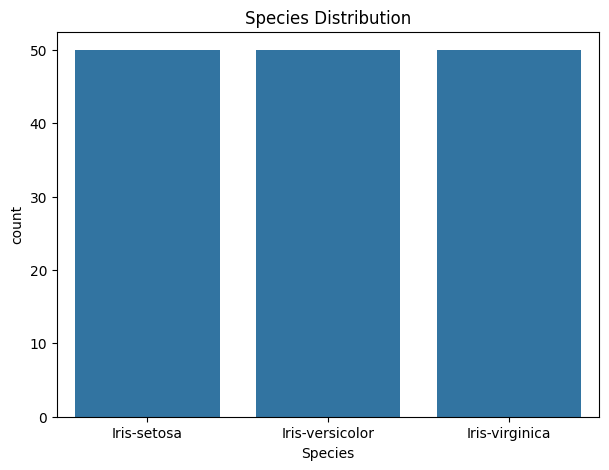


Generating Pair Plot...


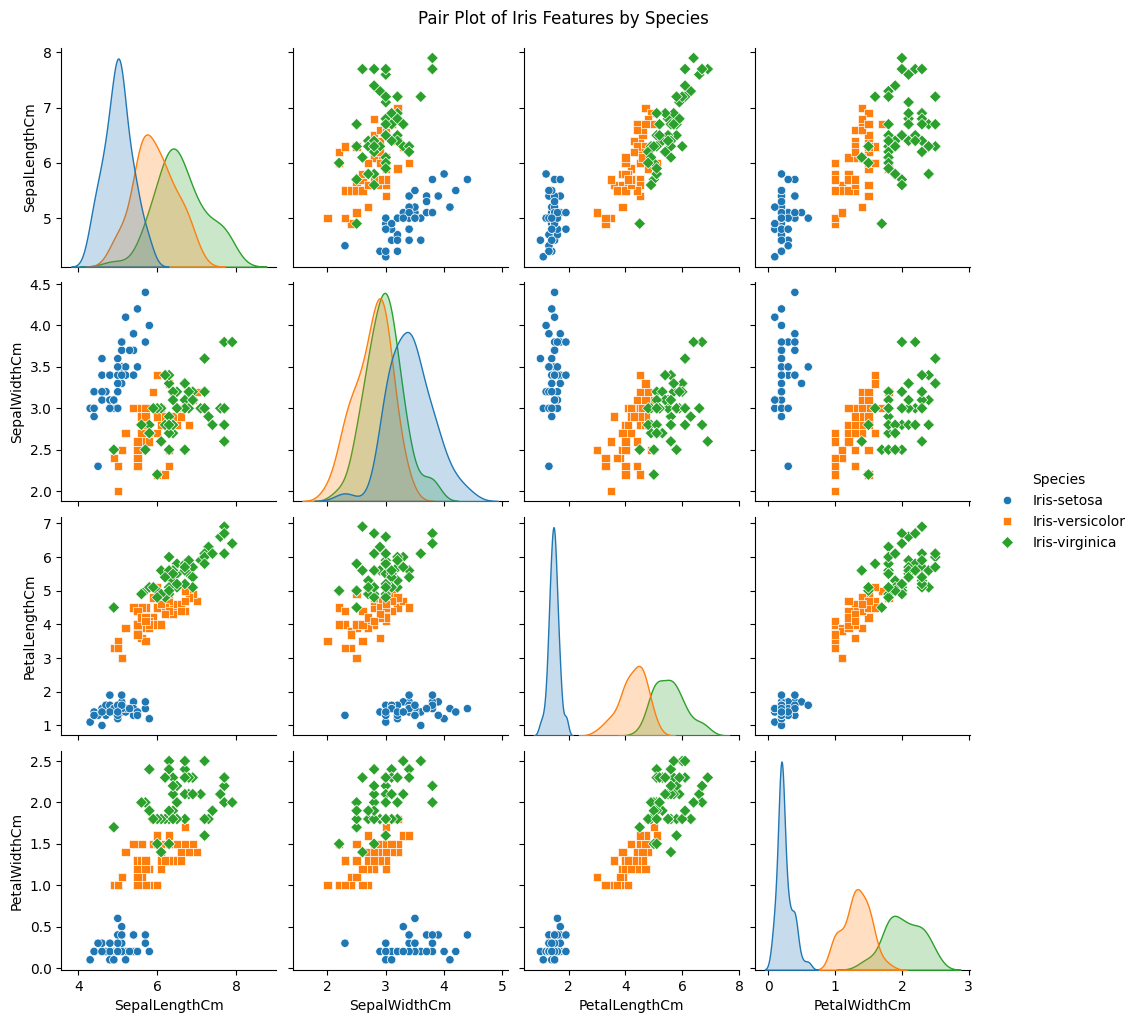

In [4]:
#  Exploratory Data Analysis (EDA)
print("2. Exploratory Data Analysis (EDA)")

# Visualize the distribution of the target species
plt.figure(figsize=(7, 5))
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.show()

# Visualize feature relationships (Pair Plot)
print("\nGenerating Pair Plot...")
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

In [5]:
#  DATA PREPROCESSING
print("3. Data Preprocessing")

# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Convert the categorical species names (y) into numerical labels (0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,
    random_state=42
)

print(f"Features (X) shape: {X.shape}")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

3. Data Preprocessing
Features (X) shape: (150, 4)
Training set size: 105 samples
Testing set size: 45 samples


In [6]:
# MODEL TRAINING (K-Nearest Neighbors)
print("4. Model Training (K-Nearest Neighbors)")

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(f"KNN Model trained with k={k}.")

# MODEL EVALUATION AND PREDICTION
print("\n5. Model Evaluation and Prediction")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate Classification Report
target_names = le.classes_
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:")
print(report)

4. Model Training (K-Nearest Neighbors)
KNN Model trained with k=5.

5. Model Evaluation and Prediction
Accuracy Score: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [7]:
# Example Prediction on New Data
print("6. Example Prediction")

# Example new flower measurement: [SL, SW, PL, PW]
# This measurement is close to an Iris-versicolor
new_flower = pd.DataFrame({
    'SepalLengthCm': [6.0],
    'SepalWidthCm': [2.8],
    'PetalLengthCm': [4.5],
    'PetalWidthCm': [1.3]
})

# Make a prediction
prediction_encoded = knn.predict(new_flower)
predicted_species = le.inverse_transform(prediction_encoded)

print(f"Input Measurement: {new_flower.values[0]}")
print(f"The predicted species is: {predicted_species[0]}")

6. Example Prediction
Input Measurement: [6.  2.8 4.5 1.3]
The predicted species is: Iris-versicolor
